In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
import numpy as np
import seaborn as sns
%matplotlib inline

In [54]:
merged.to_csv('../../data/housing2019.csv')

In [37]:
for i in sorted(merged.columns):
    print(i)

AFCurrentUseLand
AFForestLand
AFHistoricProperty
AFNonProfitUse
Access
AddnlCost
Address
AdjacentGolfFairway
AdjacentGreenbelt
AirportNoise
Area
Bath3qtrCount
BathFullCount
BathHalfCount
Bedrooms
BldgGrade
BldgGradeVar
BldgNbr
BrickStone
BuildingNumber
BuyerName
Cascades
CoalMineHazard
Condition
Contamination
CriticalDrainage
CurrentUseDesignation
CurrentZoning
DNRLease
DaylightBasement
DeedRestrictions
DevelopmentRightsPurch
DirectionPrefix
DirectionSuffix
DistrictName
DocumentDate
Easements
ErosionHazard
ExciseTaxNbr
FinBasementGrade
FpAdditional
FpFreestanding
FpMultiStory
FpSingleStory
Fraction
HBUAsIfVacant
HBUAsImproved
HeatSource
HeatSystem
HistoricSite
HundredYrFloodPlain
InadequateParking
LakeSammamish
LakeWashington
LandfillBuffer
LandslideHazard
LevyCode
LotDepthFactor
Major
Major_x
Major_y
Minor
Minor_x
Minor_y
MtRainier
NativeGrowthProtEsmt
NbrBldgSites
NbrLivingUnits
Obsolescence
Olympics
OtherDesignation
OtherNuisances
OtherProblems
OtherView
Page
PcntComplete
PcntNetCon

In [1]:
merged['Sqft'] = merged['SqFtTotLiving'] + merged['SqFtFinBasement'] + merged['SqFtDeck']
trimmed = merged[(merged['SalePrice'] < 5000000) & (merged['SqFtTotLiving'] < 50000) & (merged['SalePrice'] > 10)]
sqft = trimmed['SqFtTotLiving']
price = trimmed['SalePrice']

NameError: name 'merged' is not defined

In [49]:
trimmed.shape

(29621, 157)

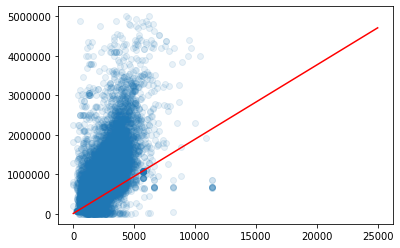

In [50]:
x = np.linspace(0, 25000, num = 1000)
y = x * 187.7 + 1.248 * 10 ** 4
plt.scatter(sqft, price, alpha = 0.1)
plt.plot(x, y, color = 'r')

In [40]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving + SqFtOpenPorch + SqFtDeck + TidelandShoreland", data=trimmed).fit()

In [41]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     4270.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:59:17   Log-Likelihood:            -4.2506e+05
No. Observations:               29621   AIC:                         8.501e+05
Df Residuals:                   29616   BIC:                         8.502e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.265e+05   5817.454     21.737      0.000    1.15e+05    1.38e+05
SqFtTotLiving       282.0029      2.729    103.336      0.000     276.654     287.352
SqFtOpenPorch       177.2993     18.373      9.650      0.000     141.288     213.311
SqFtDeck            195.9824     11.759     16.666      0.000     172.934     219.031
TidelandShoreland   3.77e+05   1.49e+04     25.289      0.000    3.48e+05    4.06e+05
==============================================================================
Omnibus:                    14640.055   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222241.968
Skew:                           2.006   Prob(JB):                         0.00
Kurtosis:                      15.805   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9691958363905531
Rainbow p-value: 0.9715225528398246


In [15]:
corr = merged.corr()["SalePrice"]

In [16]:
corr['SqFtTotLiving']

0.17198383602338405

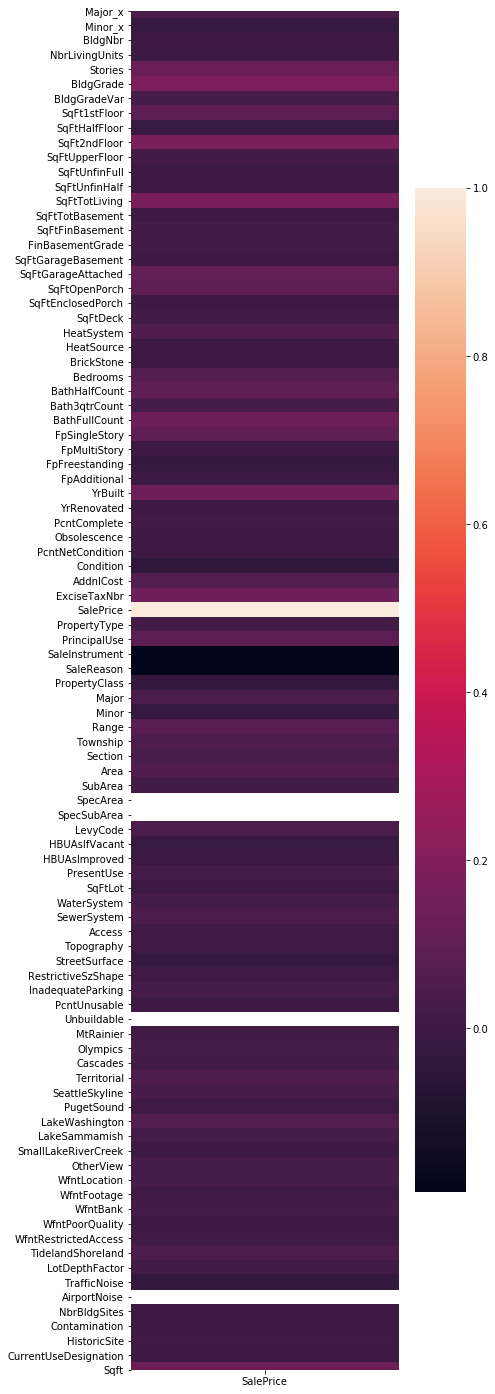

In [17]:
'''
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1)
'''

fig1, ax1 = plt.subplots(figsize=(6, 25))

sns.heatmap(pd.DataFrame(corr), ax = ax1)